# Punto 5:

Datos de esfuerzo [MPa]:  [  0.         101.85916358 203.71832716 305.57749074 356.50707253
 407.43665432 458.3662361  470.58933573]
Datos de deformacion [mm/mm]:  [0.       0.001226 0.002454 0.003696 0.01     0.027    0.058    0.068   ]
El módulo de Young es: 83.08251515400356 GPa
El esfuerzo de fluencia es 335.4094880957645MPa cuando la probeta se deforma 0.006037064687726922mm/mm
Datos del offset:  [0.002    0.003226 0.004454 0.005696 0.012   ] [  0.         101.85916358 203.88449219 307.07297601 830.82515154]
Por esto, su elasticidad es 0.006037064687726922 mm/mm, o 0.6037064687726922%
El módulo de resiliencia es aproximadamente 1.0124443882557517
La ductilidad en área es 13.510000000000003%
La ductilidad en elongación es 6.200000000000003%
El esfuerzo de fractura real es 544.0968155094417MPa, mientras que el de ingeniería es 470.58933573411616MPa
El módulo de tenacidad es 27.211471831752718
Si este acero se va a utilizar en una estructura rígida, los esfuerzos no deben superar los

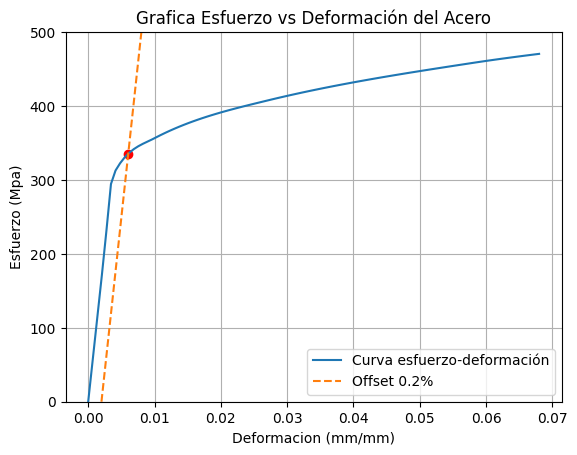

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from intersect import intersection
from scipy.interpolate import splrep, PchipInterpolator
import matplotlib.pyplot as plt 


carga = [0,50000,100000,150000,175000,200000,225000,231000]
longitud = [50,50.0613,50.1227,50.1848,50.5,51.35,52.9,53.4]

area_inicial = ((np.pi) * 0.25 * 25**2)
longitud_inicial = 50
area_final = ((np.pi) * 0.25 * 23.25**2)
longitud_final = 53.1

esfuerzo = np.array([(i / area_inicial) for i in carga])
deformacion = np.array([((i - longitud_inicial)/longitud_inicial) for i in longitud])

print("Datos de esfuerzo [MPa]: ", esfuerzo)
print("Datos de deformacion [mm/mm]: ", deformacion)

#a. plotear curva esfuerzo deformacion

spl = PchipInterpolator(deformacion, esfuerzo)
deformacion_suave = np.linspace(min(deformacion), max(deformacion), num=100)
esfuerzo_suave = spl(deformacion_suave)

plt.plot(deformacion_suave, esfuerzo_suave, label="Curva esfuerzo-deformación")

#c. Modulo de young (usando los primeros 2 datos)
E = (esfuerzo[1] / deformacion[1])
print(f"El módulo de Young es: {E/1000} GPa")

#b. Esfuerzo de fluencia
x_offset = np.array([i for i in deformacion[0:5]])
x_offset_translated = np.array([x + 0.002 for x in x_offset])
y_offset = np.array([(E*(i)) for i in x_offset])

x_yield, y_yield = intersection(deformacion_suave, esfuerzo_suave, x_offset_translated, y_offset)
plt.scatter(x_yield, y_yield, color='red')
print(f"El esfuerzo de fluencia es {y_yield[0]}MPa cuando la probeta se deforma {x_yield[0]}mm/mm")    
plt.plot(x_offset_translated,y_offset,linestyle="dashed",label="Offset 0.2%")

print("Datos del offset: ", x_offset_translated, y_offset )

#d. Elasticidad.
print(f"Por esto, su elasticidad es {x_yield[0]} mm/mm, o {x_yield[0]*100}%")

#e. Resiliencia
resiliencia = 0.5*x_yield[0]*y_yield[0]
print(f"El módulo de resiliencia es aproximadamente {resiliencia}")

#f. Ductilidad en area
duct_area = (area_inicial - area_final)/area_inicial
print(f"La ductilidad en área es {duct_area*100}%")

#g. Ductilidad en elongación
duct_elong = (longitud_final - longitud_inicial)/longitud_inicial
print(f"La ductilidad en elongación es {duct_elong*100}%")

#h. Esfuerzo de fractura real y de ingeniería
e_frac = esfuerzo[-1]
e_frac_ing = carga[-1]/area_final
print(f"El esfuerzo de fractura real es {e_frac_ing}MPa, mientras que el de ingeniería es {e_frac}MPa")

#i. Módulo de tenacidad. 
area = np.trapz(esfuerzo,deformacion)
print(f"El módulo de tenacidad es {area}")

#j. 
print(f"Si este acero se va a utilizar en una estructura rígida, los esfuerzos no deben superar los {y_yield[0]}MPa para no someterlo a deformaciones plásticas")

#k. 
print(f"Para laminar el acero, se debe exceder los {y_yield[0]}, para así deformarlo plásticamente")


plt.xlabel("Deformacion (mm/mm)")
plt.ylabel("Esfuerzo (Mpa)")  
plt.title('Grafica Esfuerzo vs Deformación del Acero')
plt.legend(loc="lower right")
plt.grid(True)

ax = plt.gca()
ax.set_ylim([0, 500])

plt.show()

# Punto 1:

Datos de esfuerzo [MPa]:  [ 0.         16.4542667  32.9085334  49.37513463 65.82940133 82.29600257
 91.07818989 87.78486964 77.9049089 ]
Datos de deformacion [mm/mm]:  [0.         0.00374016 0.00748031 0.01181102 0.01594488 0.0230315
 0.03503937 0.04704724 0.06003937]
El módulo de Young es: 4.399351 GPa
El esfuerzo de fluencia es 74.009925 MPa
El esfuerzo máximo de tensión ingenieril es: 91.07819MPa 
Su elasticidad es 0.018823 mm/mm, o 1.882292%
La ductilidad en área es 3.469375%
El módulo de resiliencia es 0.696541 J/m^3
El módulo de tenacidad es 4.292261 J/m^3


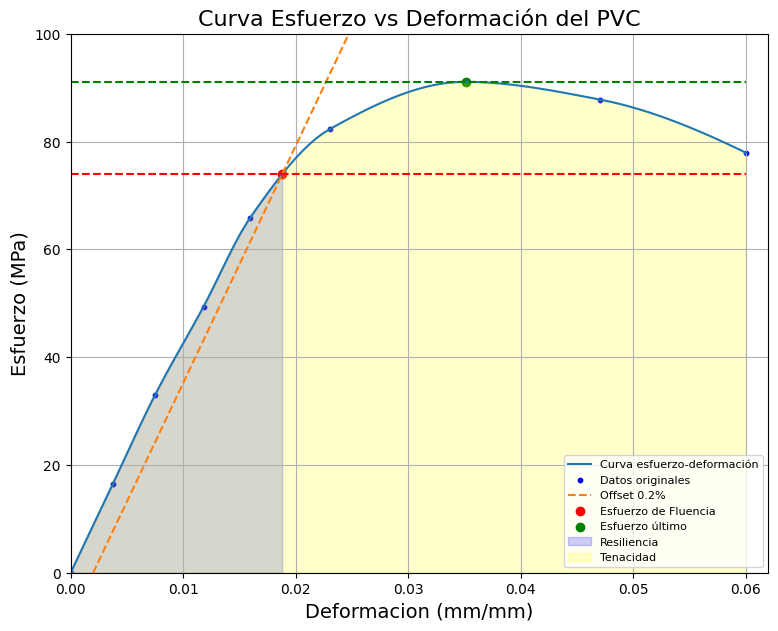

In [58]:
carga = [0,1334 ,2668,4003,5337, 6672,7384,7117,6316]
longitud = [50.8,50.99,51.18,51.40,51.61,51.97,52.58,53.19,53.85]

sigfig = 6
area_inicial = ((np.pi) * 0.25 * 10.16**2)
longitud_inicial = 50.8
area_final = ((np.pi) * 0.25 * 9.9822**2)
longitud_final = 53.086

esfuerzo = np.array([(i / area_inicial) for i in carga])
deformacion = np.array([((i - longitud_inicial)/longitud_inicial) for i in longitud])

print("Datos de esfuerzo [MPa]: ", esfuerzo)
print("Datos de deformacion [mm/mm]: ", deformacion)

#suavizar
spl = PchipInterpolator(deformacion, esfuerzo)
deformacion_suave = np.linspace(min(deformacion), max(deformacion), num=100)
esfuerzo_suave = spl(deformacion_suave)

#plotear curva esfuerzo deformacio suavizada
plt.figure(figsize=(9, 7))
plt.plot(deformacion_suave, esfuerzo_suave, label="Curva esfuerzo-deformación")
plt.scatter(deformacion, esfuerzo, color='blue', s=10, label='Datos originales')

#a. Modulo de young (usando los primeros 2 datos)
E = (esfuerzo[1] / deformacion[1])
print(f"El módulo de Young es: {round(E/1000, sigfig)} GPa")

#b. Esfuerzo de fluencia
x_offset = np.array([i for i in deformacion[0:6]])
x_offset_translated = np.array([x + 0.002 for x in x_offset])
y_offset = np.array([(E*(i)) for i in x_offset])

x_yield, y_yield = intersection(deformacion_suave, esfuerzo_suave, x_offset_translated, y_offset)
print(f"El esfuerzo de fluencia es {round(y_yield[0], sigfig)} MPa")    
plt.plot(x_offset_translated,y_offset,linestyle="dashed",label="Offset 0.2%")
plt.scatter(x_yield, y_yield, color='red', label='Esfuerzo de Fluencia')

yieldplot = [y_yield]*len(deformacion)
plt.plot(deformacion,yieldplot,linestyle="dashed",color='red')

#c. Esfuerzo máximo de tensión ingenieril
s_ult_norma = max(carga) / area_inicial
s_ult_index = np.argmax(esfuerzo_suave)
def_ult = deformacion_suave[s_ult_index]
s_ult = esfuerzo_suave[s_ult_index]


plt.scatter(def_ult, s_ult, color='green', label='Esfuerzo último')
print(f"El esfuerzo máximo de tensión ingenieril es: {round(s_ult_norma,sigfig)}MPa ")

s_ultplot = [s_ult]*len(deformacion)
plt.plot(deformacion,s_ultplot,linestyle="dashed", color='green')

#d. Elasticidad.
print(f"Su elasticidad es {round(x_yield[0], sigfig)} mm/mm, o {round(x_yield[0]*100,sigfig)}%")

#e. Ductilidad en area
duct_area = (area_inicial - area_final)/area_inicial
print(f"La ductilidad en área es {round(duct_area*100,sigfig)}%")

#f. Resiliencia
resiliencia = 0.5*x_yield[0]*y_yield[0]
print(f"El módulo de resiliencia es {round(resiliencia,sigfig)} J/m^3")
plt.fill_between(deformacion_suave, esfuerzo_suave, where=(deformacion_suave <= x_yield), color='blue', alpha=0.2, label='Resiliencia')

#g. Módulo de tenacidad. 
area = np.trapz(esfuerzo_suave,deformacion_suave)
print(f"El módulo de tenacidad es {round(area,sigfig)} J/m^3")
plt.fill_between(deformacion_suave, esfuerzo_suave, color='yellow', alpha=0.2, label='Tenacidad')

#plot
plt.xlabel("Deformacion (mm/mm)", fontsize=14)
plt.ylabel("Esfuerzo (MPa)", fontsize=14)
plt.title('Curva Esfuerzo vs Deformación del PVC', fontsize=16)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=8)
plt.grid(True)
ax = plt.gca()
ax.set_ylim([0, 100])
ax.set_xlim([0, 0.062])

plt.show()

# Punto 4: 

Datos de esfuerzo [MPa]:  [  0.          56.96317055 117.34568558 179.51558523 236.24561865
 267.33056847 298.4155183  320.95210692 348.15143801 359.03117045
 367.57953165 369.13377914 358.25404671 348.15143801 331.05471561
 282.87304339]
Datos de deformacion [mm/mm]:  [0.         0.00100394 0.00200787 0.00299213 0.00399606 0.005
 0.01       0.02       0.04       0.06       0.08       0.1
 0.12       0.135      0.15       0.165     ]
El módulo de Young es: 56.739786 GPa
El esfuerzo de fluencia es 285.063685 MPa cuando la probeta se deforma 0.007024mm/mm
El esfuerzo máximo de tensión ingenieril es: 369.133779MPa 
La ductilidad es aproximadamente 16.0014555649848%
El módulo de resiliencia es 1.001151 J/m^3


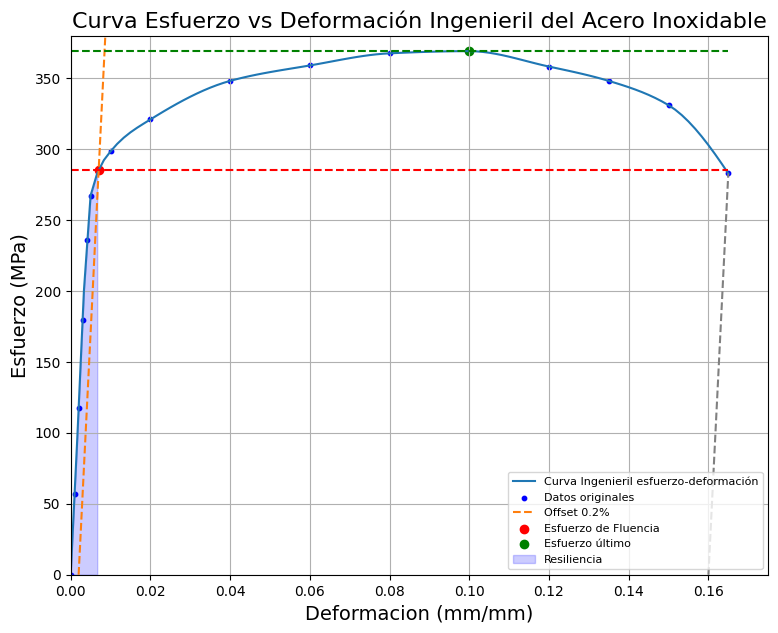

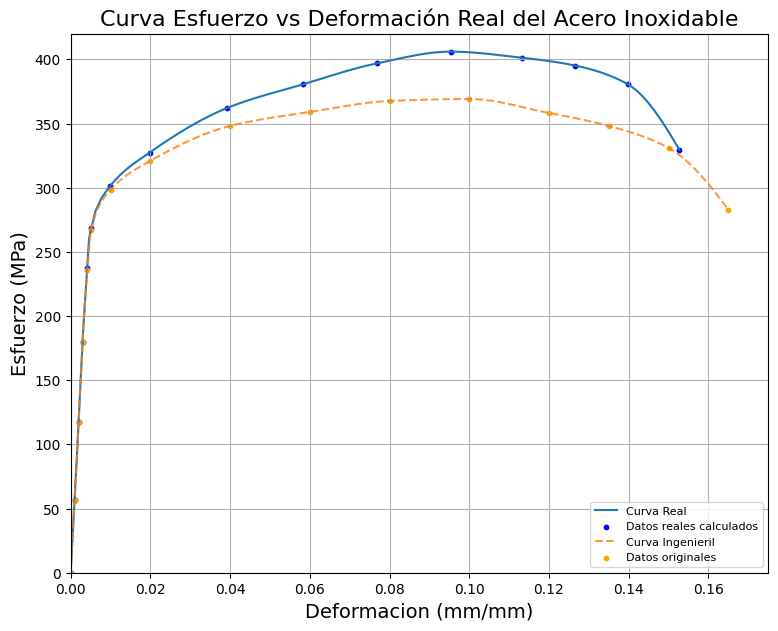

In [61]:
carga = [0,7330, 15100, 23100, 30400, 34400 , 38400, 41300, 44800, 46200 , 47300, 47500, 46100, 44800, 42600, 36400]
longitud = [50.800, 50.851, 50.902, 50.952, 51.003, 51.054, 51.308, 51.816, 52.832, 53.848, 54.864, 55.880, 56.896, 57.658, 58.420, 59.182]

area_inicial = ((np.pi) * 0.25 * 12.8**2)
longitud_inicial = 50.8
area_final = ((np.pi) * 0.25 * 13**2)
longitud_final = 53.086

esfuerzo = np.array([(i / area_inicial) for i in carga])
deformacion = np.array([((i - longitud_inicial)/longitud_inicial) for i in longitud])

print("Datos de esfuerzo [MPa]: ", esfuerzo)
print("Datos de deformacion [mm/mm]: ", deformacion)

#suavizar
spl = PchipInterpolator(deformacion, esfuerzo)
deformacion_suave = np.linspace(min(deformacion), max(deformacion), num=100)
esfuerzo_suave = spl(deformacion_suave)

#a. plotear curva esfuerzo deformacion ingenieril suavizada
plt.figure(figsize=(9, 7))
plt.plot(deformacion_suave, esfuerzo_suave, label="Curva Ingenieril esfuerzo-deformación")
plt.scatter(deformacion, esfuerzo, color='blue', s=10, label='Datos originales')

#c. Modulo de young (usando los primeros 2 datos)
E = (esfuerzo[1] / deformacion[1])
print(f"El módulo de Young es: {round(E/1000, sigfig)} GPa")

#d. Esfuerzo de fluencia
x_offset = np.array([i for i in deformacion[0:10]])
x_offset_translated = np.array([x + 0.002 for x in x_offset])
y_offset = np.array([(E*(i)) for i in x_offset])

x_yield, y_yield = intersection(deformacion_suave, esfuerzo_suave, x_offset_translated, y_offset)
print(f"El esfuerzo de fluencia es {round(y_yield[0], sigfig)} MPa cuando la probeta se deforma {round(x_yield[0], sigfig)}mm/mm")    
plt.plot(x_offset_translated,y_offset,linestyle="dashed",label="Offset 0.2%")
plt.scatter(x_yield, y_yield, color='red', label='Esfuerzo de Fluencia')

yieldplot = [y_yield]*len(deformacion)
plt.plot(deformacion,yieldplot,linestyle="dashed",color='red')

#e. Esfuerzo máximo de tensión ingenieril
s_ult_norma = max(carga) / area_inicial
s_ult_index = np.argmax(esfuerzo_suave)
def_ult = deformacion_suave[s_ult_index]
s_ult = esfuerzo_suave[s_ult_index]

plt.scatter(def_ult, s_ult, color='green', label='Esfuerzo último')
print(f"El esfuerzo máximo de tensión ingenieril es: {round(s_ult_norma,sigfig)}MPa ")
s_ultplot = [s_ult]*len(deformacion)
plt.plot(deformacion,s_ultplot,linestyle="dashed",color='green')

#f. ductilidad aproximada. Se toma el último dato de deformación, y baja con la misma pendiente hasta encontrar la deformación unitaria correspondiente
# luego, se aplica esa deformación unitaria al valor original de longitud de la probeta para obtener la longitud final aproximada
x_intercept = deformacion[-1] - ((esfuerzo_suave[-1]) / E)
plt.plot([x_intercept, deformacion_suave[-1]], [0, esfuerzo_suave[-1]], color='grey', linestyle='dashed')
longitud_final = longitud_inicial*x_intercept + longitud_inicial

ductilidad = (longitud_final-longitud_inicial)/longitud_inicial 
print(f"La ductilidad es aproximadamente {ductilidad*100}%")

#g. Resiliencia calculada con el triangulo de la región elástica
resiliencia = 0.5*x_yield[0]*y_yield[0]
print(f"El módulo de resiliencia es {round(resiliencia,sigfig)} J/m^3")
plt.fill_between(deformacion_suave, esfuerzo_suave, where=(deformacion_suave <= x_yield), color='blue', alpha=0.2, label='Resiliencia')

#plot
plt.xlabel("Deformacion (mm/mm)", fontsize=14)
plt.ylabel("Esfuerzo (MPa)", fontsize=14)
plt.title('Curva Esfuerzo vs Deformación Ingenieril del Acero Inoxidable', fontsize=16)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=8)
plt.grid(True)

ax = plt.gca()
ax.set_ylim([0, 380])
ax.set_xlim([0, 0.175])
plt.show()

#gráfica real

deformacion_real = np.log(1 + deformacion)
esfuerzo_real = esfuerzo * (1 + deformacion)

spl_real = PchipInterpolator(deformacion_real, esfuerzo_real)
deformacion_suave_real = np.linspace(min(deformacion_real), max(deformacion_real), num=100)
esfuerzo_suave_real = spl_real(deformacion_suave_real)

plt.figure(figsize=(9, 7))
plt.plot(deformacion_suave_real, esfuerzo_suave_real, label="Curva Real")
plt.scatter(deformacion_real, esfuerzo_real, color='blue', s=10, label='Datos reales calculados')
plt.plot(deformacion_suave, esfuerzo_suave, label="Curva Ingenieril", linestyle='dashed', alpha=0.8)
plt.scatter(deformacion, esfuerzo, color='orange', s=10, label='Datos originales')

plt.xlabel("Deformacion (mm/mm)", fontsize=14)
plt.ylabel("Esfuerzo (MPa)", fontsize=14)
plt.title('Curva Esfuerzo vs Deformación Real del Acero Inoxidable', fontsize=16)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=8)
plt.grid(True)

ax = plt.gca()
ax.set_ylim([0, 420])
ax.set_xlim([0, 0.175])
plt.show()


# Punto 6: 

Datos de esfuerzo [MPa]:  [ 0.   14.98 29.96 37.44 44.93 52.42 59.91 61.91 56.91]
Datos de deformacion [mm/mm]:  [0.       0.000835 0.001665 0.002085 0.0045   0.02     0.13     0.25
 0.51    ]
El módulo de Young es: 17940.11976 ksi
El esfuerzo de fluencia es 44.932665 ksi
El esfuerzo máximo de tensión ingenieril es: 61.909968 ksi 
El módulo de resiliencia es 0.101202 lbin/in^3
El módulo de tenacidad es 30.095218 lbin/in^3


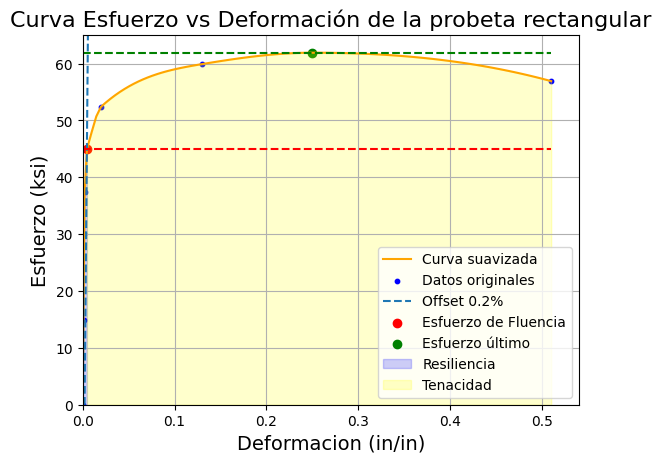

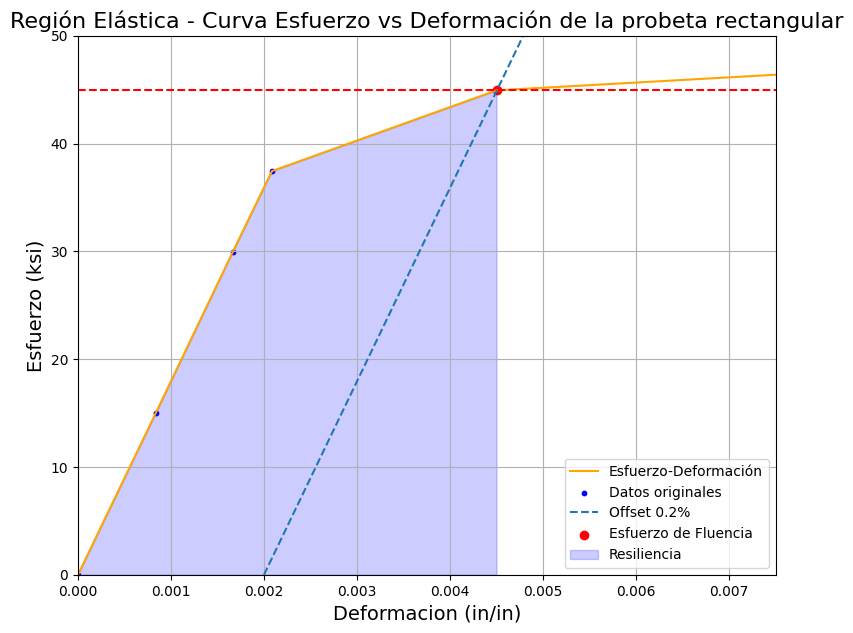

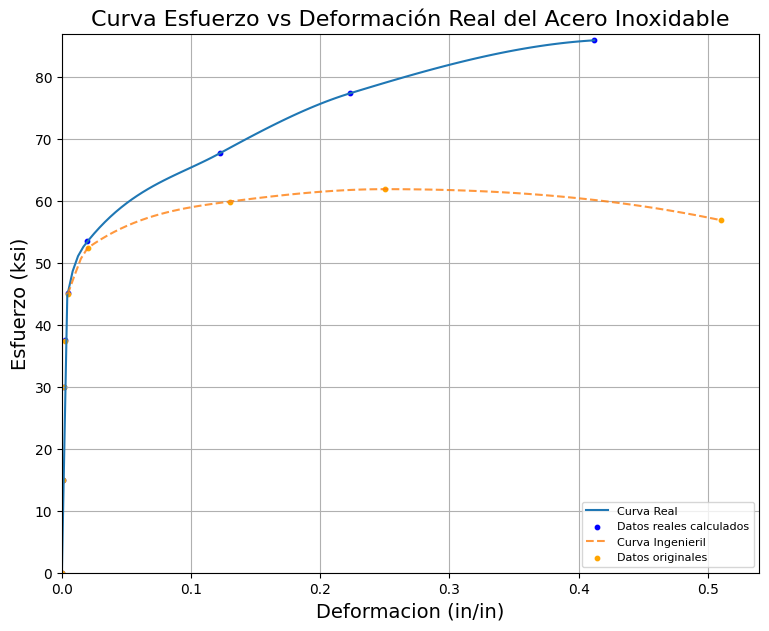

In [66]:
esfuerzo = np.array([0,14.98,29.96,37.44,44.93,52.42,59.91,61.91,56.91])
deformacion = np.array([0,0.000835,0.001665,0.002085,0.0045,0.02,0.13,0.25,0.51])

print("Datos de esfuerzo [MPa]: ", esfuerzo)
print("Datos de deformacion [mm/mm]: ", deformacion)

#suavizar
spl = PchipInterpolator(deformacion, esfuerzo)
deformacion_suave = np.linspace(min(deformacion), max(deformacion), num=0)
esfuerzo_suave = spl(deformacion_suave)

#plotear curva esfuerzo deformacio suavizada
# Graficar los primeros 4 puntos con líneas rectas
plt.plot(deformacion[:5], esfuerzo[:5], color='orange')

# Suavizar a partir del quinto punto
spl = PchipInterpolator(deformacion[4:], esfuerzo[4:])
deformacion_suave = np.linspace(min(deformacion[4:]), max(deformacion[4:]), num=100)
esfuerzo_suave = spl(deformacion_suave)

# Graficar la curva suavizada
plt.plot(deformacion_suave, esfuerzo_suave, color='orange', label="Curva suavizada")

# Agregar puntos originales
plt.scatter(deformacion, esfuerzo, color='blue', s=10, label='Datos originales')

#c. Modulo de young (usando los primeros 2 datos)
E = (esfuerzo[1] / deformacion[1])
print(f"El módulo de Young es: {round(E, sigfig)} ksi")

#d. Esfuerzo de fluencia
x_offset = np.array([i for i in deformacion[0:6]])
x_offset_translated = np.array([x + 0.002 for x in x_offset])
y_offset = np.array([(E*(i)) for i in x_offset])

x_yield, y_yield = intersection(deformacion_suave, esfuerzo_suave, x_offset_translated, y_offset)
print(f"El esfuerzo de fluencia es {round(y_yield[0], sigfig)} ksi")    
plt.plot(x_offset_translated,y_offset,linestyle="dashed",label="Offset 0.2%")
plt.scatter(x_yield, y_yield, color='red', label='Esfuerzo de Fluencia')

yieldplot = [y_yield]*len(deformacion)
plt.plot(deformacion,yieldplot,linestyle="dashed",color='red')

#e. Esfuerzo máximo de tensión ingenieril. Se usa el máximo del dataset porque no hay area transversal

s_ult_index = np.argmax(esfuerzo_suave)
def_ult = deformacion_suave[s_ult_index]
s_ult = esfuerzo_suave[s_ult_index]

plt.scatter(def_ult, s_ult, color='green', label='Esfuerzo último')
print(f"El esfuerzo máximo de tensión ingenieril es: {round(s_ult,sigfig)} ksi ")

s_ultplot = [s_ult]*len(deformacion)
plt.plot(deformacion,s_ultplot,linestyle="dashed", color='green')

#f. Resiliencia
resiliencia = 0.5*x_yield[0]*y_yield[0]
print(f"El módulo de resiliencia es {round(resiliencia,sigfig)} lbin/in^3")
plt.fill_between(deformacion, esfuerzo, where=(deformacion <= x_yield), color='blue', alpha=0.2, label='Resiliencia')

#g. Módulo de tenacidad. 
area = np.trapz(esfuerzo_suave,deformacion_suave)
print(f"El módulo de tenacidad es {round(area,sigfig)} lbin/in^3")
plt.fill_between(deformacion_suave, esfuerzo_suave, color='yellow', alpha=0.2, label='Tenacidad')

#plot
plt.xlabel("Deformacion (in/in)", fontsize=14)
plt.ylabel("Esfuerzo (ksi)", fontsize=14)
plt.title('Curva Esfuerzo vs Deformación de la probeta rectangular', fontsize=16)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=10)
plt.grid(True)
ax = plt.gca()
ax.set_ylim([0, 65])
ax.set_xlim([0, 0.54])

plt.show()

# Ampliacion Region Elástica
fig, ax2 = plt.subplots(figsize=(9, 7))
ax2.plot(deformacion[:6], esfuerzo[:6], color='orange', label='Esfuerzo-Deformación')
ax2.scatter(deformacion, esfuerzo, color='blue', s=10, label='Datos originales')
ax2.set_ylim([0, 50])
ax2.set_xlim([0, 0.0075])

plt.plot(x_offset_translated,y_offset,linestyle="dashed",label="Offset 0.2%")
plt.scatter(x_yield, y_yield, color='red', label='Esfuerzo de Fluencia')
plt.plot(deformacion,yieldplot,linestyle="dashed",color='red')
plt.fill_between(deformacion, esfuerzo, where=(deformacion <= x_yield), color='blue', alpha=0.2, label='Resiliencia')

ax2.set_xlabel("Deformacion (in/in)", fontsize=14)
ax2.set_ylabel("Esfuerzo (ksi)", fontsize=14)
ax2.set_title('Región Elástica - Curva Esfuerzo vs Deformación de la probeta rectangular', fontsize=16)
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=10)
ax2.grid(True)

plt.show()

#gráfica real

deformacion_real = np.log(1 + deformacion)
esfuerzo_real = esfuerzo * (1 + deformacion)

spl_real = PchipInterpolator(deformacion_real, esfuerzo_real)
deformacion_suave_real = np.linspace(min(deformacion_real), max(deformacion_real), num=100)
esfuerzo_suave_real = spl_real(deformacion_suave_real)

plt.figure(figsize=(9, 7))
plt.plot(deformacion_suave_real, esfuerzo_suave_real, label="Curva Real")
plt.scatter(deformacion_real, esfuerzo_real, color='blue', s=10, label='Datos reales calculados')
plt.plot(deformacion_suave, esfuerzo_suave, label="Curva Ingenieril", linestyle='dashed', alpha=0.8)
plt.scatter(deformacion, esfuerzo, color='orange', s=10, label='Datos originales')

plt.xlabel("Deformacion (in/in)", fontsize=14)
plt.ylabel("Esfuerzo (ksi)", fontsize=14)
plt.title('Curva Esfuerzo vs Deformación Real del Acero Inoxidable', fontsize=16)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=8)
plt.grid(True)

ax = plt.gca()
ax.set_ylim([0, 87])
ax.set_xlim([0, 0.54])
plt.show()